project django

In [ ]:
!pip install django
!pip install pandas matplotlib seaborn scikit-learn
!pip install pyngrok

**Create a new Django project**

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras yfinance


Data collection from yaho finance

In [ ]:
# scripts/data_collection.py
import yfinance as yf
import pandas as pd
from datetime import datetime

def download_forex_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data.to_csv(f'../content/sample_data/AAPL_data.csv')
    return stock_data
ticker = 'GBPJPY=X'  # Yahoo Finance ticker for GBP/JPY
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
data = download_forex_data(ticker, start_date, end_date)
print(data.head())


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GBPJPY=X']: YFChartError('%ticker%: 1h data not available for startTime=1577836800 and endTime=1718751600. The requested range must be within the last 730 days.')


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


# **Data Preprocessing**

In [ ]:
import pandas as pd

# Load data
data = pd.read_csv('../content/sample_data/AAPL_data.csv', parse_dates=True, index_col='Date')
print(data.head())
print(data.info())


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       0 non-null      object
 1   High       0 non-null      object
 2   Low        0 non-null      object
 3   Close      0 non-null      object
 4   Adj Close  0 non-null      object
 5   Volume     0 non-null      object
dtypes: object(6)
memory usage: 0.0+ bytes
None


# **Handle Missing Values:**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Fill or drop missing values
data = data.fillna(method='ffill')


Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


# **Feature Selection:**

In [ ]:
# Select relevant features for prediction
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features]
print(data.head())


Empty DataFrame
Columns: [Open, High, Low, Close, Volume]
Index: []


# **Exploratory Data Analysis (EDA)**

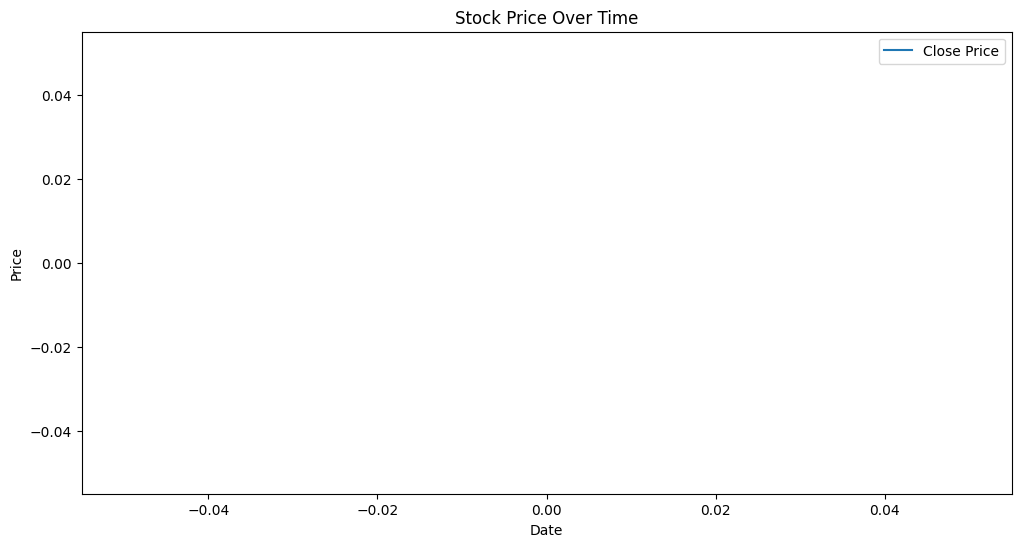

       Open High  Low Close Volume
count     0    0    0     0      0
unique    0    0    0     0      0
top     NaN  NaN  NaN   NaN    NaN
freq    NaN  NaN  NaN   NaN    NaN
        Open  High  Low  Close  Volume
Open     NaN   NaN  NaN    NaN     NaN
High     NaN   NaN  NaN    NaN     NaN
Low      NaN   NaN  NaN    NaN     NaN
Close    NaN   NaN  NaN    NaN     NaN
Volume   NaN   NaN  NaN    NaN     NaN


In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
# Descriptive statistics
print(data.describe())

 # Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)



# ** Feature Engineering**

In [ ]:

# Create moving averages
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

# Create momentum indicator
data['Momentum'] = data['Close'] - data['Close'].shift(1)

print(data.head())


Empty DataFrame
Columns: [Open, High, Low, Close, Volume, MA_50, MA_200, Momentum]
Index: []


# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define the target and features
X = data.drop(columns=['Close'])
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

# **Build a Neural Network Model:**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Reshape data for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, batch_size=1, epochs=1)




1895/1895 [==============================] - 16s 7ms/step - loss: nan


15/15 [==============================] - 1s 3ms/step
Root Mean Squared Error: 1.8830410328106042


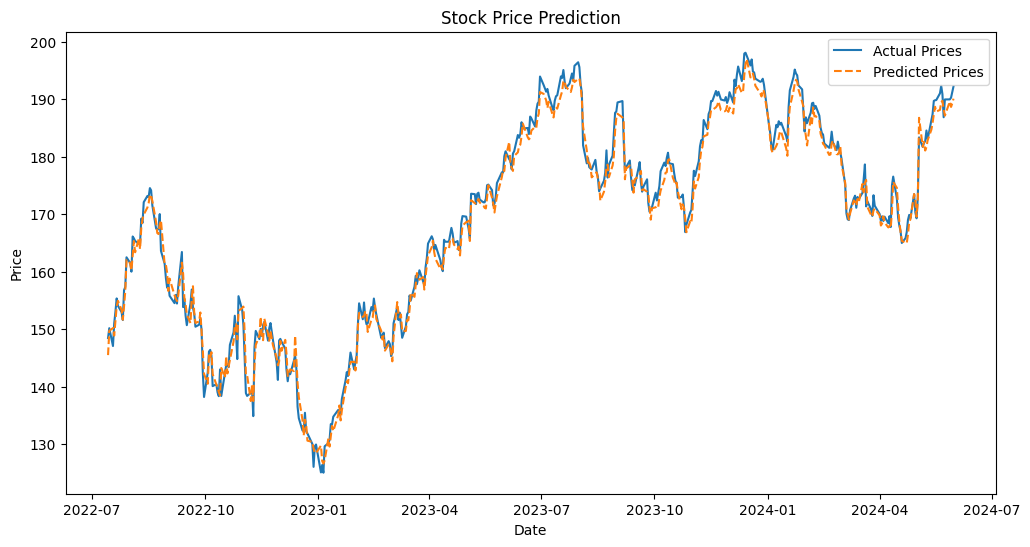

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load and prepare your data
data = pd.read_csv('../content/sample_data/AAPL_data.csv', parse_dates=True, index_col='Date')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit and transform the data
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

# Reshape for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train_scaled, batch_size=1, epochs=1)

# Predict on test data
predictions = model.predict(X_test_scaled)

# Inverse transform predictions
predictions_rescaled = target_scaler.inverse_transform(predictions)

# Calculate the RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions_rescaled))
print(f'Root Mean Squared Error: {rmse}')

# Plot Predictions vs Actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Prices')
plt.plot(y_test.index, predictions_rescaled, label='Predicted Prices', linestyle='--')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# **Script for Predicting GBP/JPY Exchange Rate Using Daily Data **

> Ajouter une citation



[*********************100%%**********************]  1 of 1 completed


Daily Data downloaded:
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-01-01  144.667801  145.307236  144.009995  144.419998  144.419998       0
2020-01-02  144.029007  144.169006  142.276001  144.048004  144.048004       0
2020-01-03  142.649002  142.737000  141.022995  142.707993  142.707993       0
2020-01-06  141.261002  142.729004  141.119995  141.201004  141.201004       0
2020-01-07  142.776993  143.272995  142.033997  142.772995  142.772995       0
Data after preprocessing:
                  Open        High         Low       Close  Volume
Date                                                              
2020-01-01  144.667801  145.307236  144.009995  144.419998       0
2020-01-02  144.029007  144.169006  142.276001  144.048004       0
2020-01-03  142.649002  142.737000  141.022995  142.707993       0
2020-01-06  141.261002  142.729004  141.119995  141.201004     

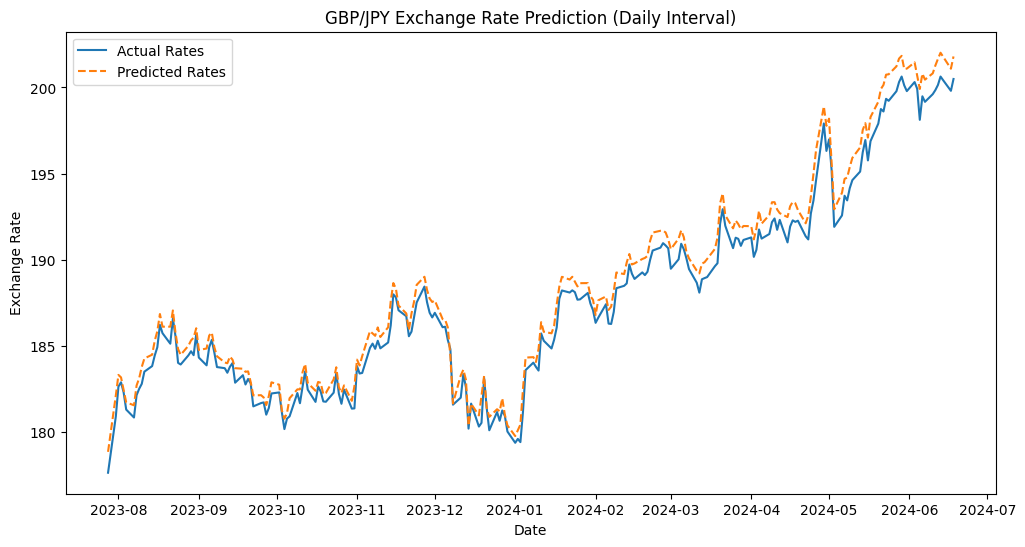

Model and scalers saved successfully.
1/1 [==============================] - 0s 27ms/step
Predicted Exchange Rate for New Data: 211.5612030029297


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Import Libraries
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Collect Daily Forex Data

def download_forex_data(pair, start_date, end_date):
    """Downloads daily forex data for a given currency pair."""
    data = yf.download(pair, start=start_date, end=end_date, interval='1d')
    data.to_csv(f'{pair}_daily_data.csv')
    return data

# Parameters
pair = 'GBPJPY=X'  # Yahoo Finance ticker for GBP/JPY
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Download data
data = download_forex_data(pair, start_date, end_date)
print("Daily Data downloaded:")
print(data.head())

# Step 2: Prepare Data for LSTM

# Load the daily data
data = pd.read_csv(f'{pair}_daily_data.csv', parse_dates=True, index_col='Date')

# Fill missing values if any
data = data.fillna(method='ffill')

# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features]

print("Data after preprocessing:")
print(data.head())

# Step 3: Split Data into Train and Test Sets

# Define features and target
X = data.drop(columns=['Close'])
y = data['Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Scale Data

# Scale the data
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_train_scaled = feature_scaler.fit_transform(X_train)
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
X_test_scaled = feature_scaler.transform(X_test)

# Reshape data for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Step 5: Build and Train the LSTM Model

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
batch_size = 32
epochs = 10

model.fit(X_train_scaled, y_train_scaled, batch_size=batch_size, epochs=epochs)

# Step 6: Evaluate the Model

# Predict on test data
predictions = model.predict(X_test_scaled)

# Inverse transform predictions
predictions_rescaled = target_scaler.inverse_transform(predictions)

# Calculate Metrics: MAE, R2 Score
mae = mean_absolute_error(y_test, predictions_rescaled)
r2 = r2_score(y_test, predictions_rescaled)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2 Score): {r2:.4f}')

# Plot Predictions vs Actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Rates')
plt.plot(y_test.index, predictions_rescaled, label='Predicted Rates', linestyle='--')
plt.title('GBP/JPY Exchange Rate Prediction (Daily Interval)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Save model and scalers if needed
model.save('gbp_jpy_lstm_model_daily.h5')
np.save('feature_scaler_daily.npy', feature_scaler)
np.save('target_scaler_daily.npy', target_scaler)

print("Model and scalers saved successfully.")

# Function to Predict New Value
def predict_new_value(model, feature_scaler, target_scaler, new_data):
    """
    Predicts the exchange rate for new data using a trained LSTM model.

    Parameters:
    - model: Trained LSTM model
    - feature_scaler: Scaler object used to scale input features
    - target_scaler: Scaler object used to scale target variable
    - new_data: Array of new data with shape (1, num_features), where num_features = 4 (Open, High, Low, Volume)

    Returns:
    - predicted_exchange_rate: Predicted exchange rate for the new data
    """
    # Remove 'Close' from new_data if present
    if new_data.shape[1] == 5:
        new_data = new_data[:, :-1]  # Remove the last column (Close)

    # Scale the new data
    new_data_scaled = feature_scaler.transform(new_data)

    # Reshape the data for LSTM [samples, time steps, features]
    new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))

    # Predict on new data
    predicted_scaled = model.predict(new_data_scaled)

    # Inverse transform to get actual exchange rate prediction
    predicted_exchange_rate = target_scaler.inverse_transform(predicted_scaled)

    return predicted_exchange_rate[0][0]

# Example usage of predict_new_value function
new_data_example = np.array([[150.0, 152.0, 148.5, 1000000]])  # Example of new data with Open, High, Low, Volume
predicted_rate = predict_new_value(model, feature_scaler, target_scaler, new_data_example)
print(f'Predicted Exchange Rate for New Data: {predicted_rate}')


SyntaxError: invalid syntax (<ipython-input-80-0137dacee3ac>, line 1)